In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,precision_recall_curve,f1_score,roc_auc_score,roc_curve  
from sklearn import metrics  
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data =sm.datasets.fair.load_pandas().data

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
data['affairs']=(data.affairs>0).astype(int)
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


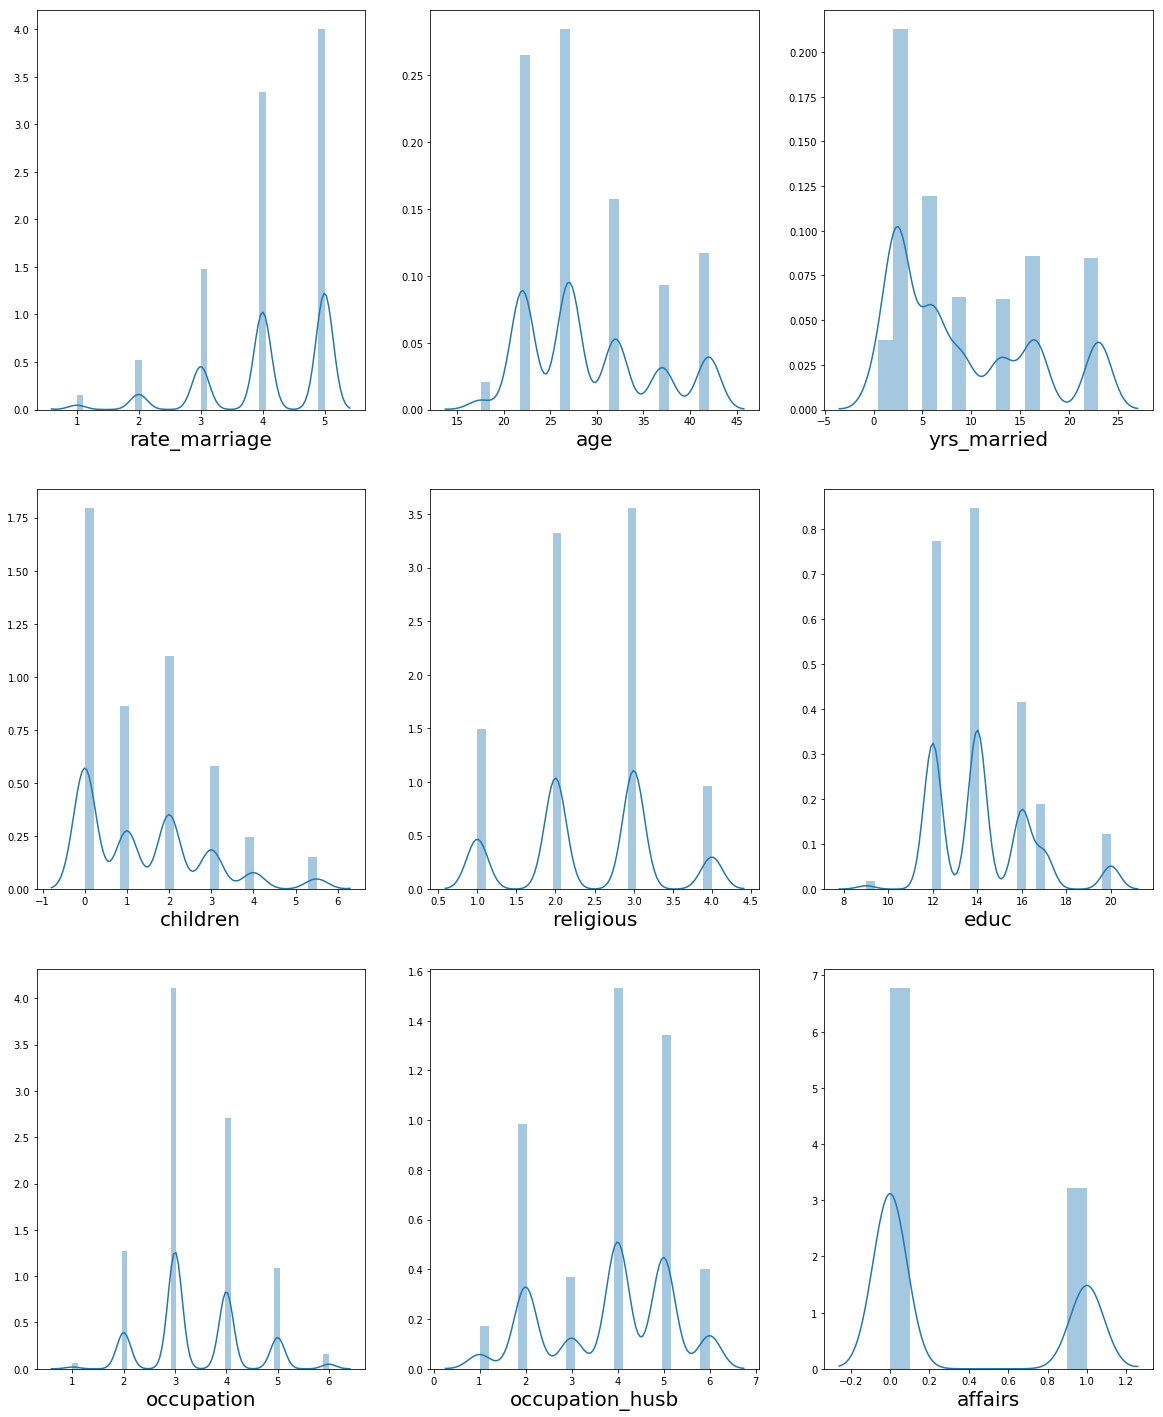

In [6]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :    
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

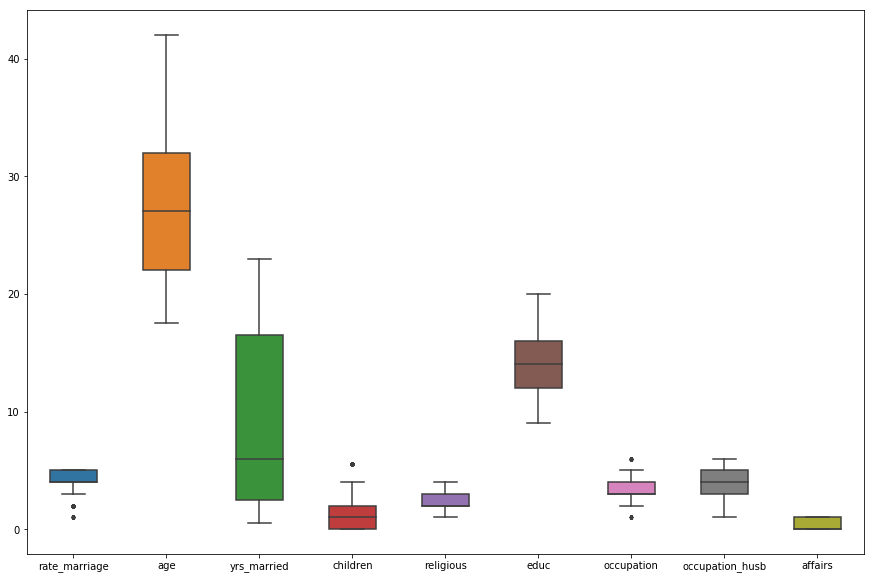

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [7]:
#to remove outliers
q=data['rate_marriage'].quantile(0.96)
data_cleaned=data[data['rate_marriage']<q]
q=data['children'].quantile(0.98)
data_cleaned=data[data['rate_marriage']<q]
q=data['occupation'].quantile(0.96)
data_cleaned=data[data['occupation']<q]
q=data['affairs'].quantile(0.90)
data_cleaned=data[data['affairs']<q]

In [8]:
X=data.drop(columns=['affairs'])
y=data['affairs']

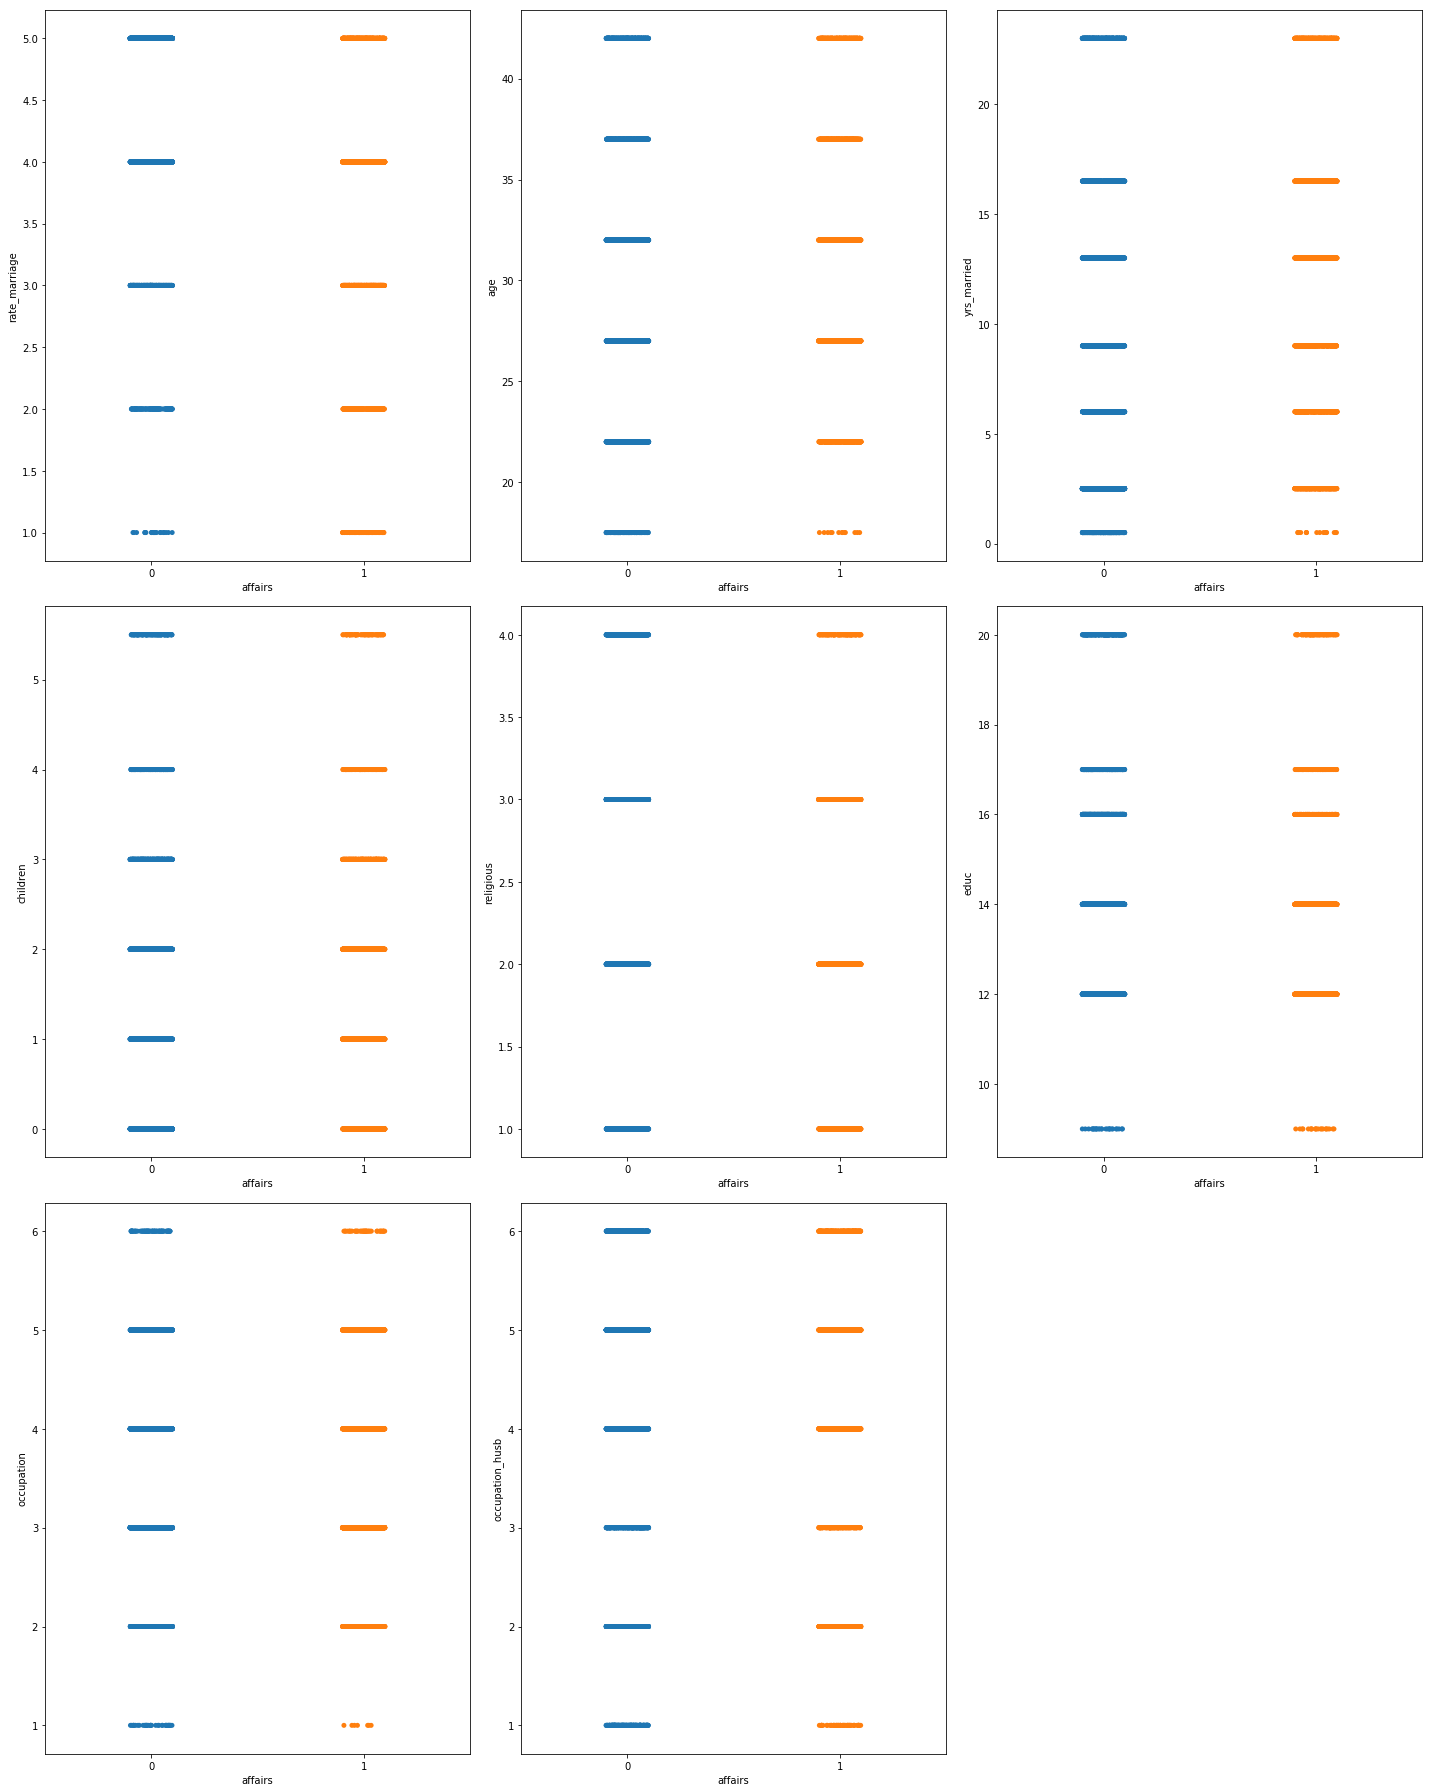

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [10]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [11]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns

vif

,vif,features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [17]:
#So as vif >5 for two rows so we drop these rows here
X=X.drop(columns=['yrs_married'])
X.head()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=355)

In [14]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7130890052356021

In [16]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1147,  141],
       [ 407,  215]], dtype=int64)

In [17]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [18]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7380952380952381

In [19]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.890527950310559

In [20]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6180935571488486

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

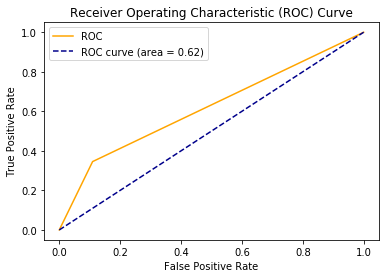

In [22]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [23]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)